In [9]:
# height
max = 1648.679809570313
min = -418.9165344238281

# # slope
# max = 60.484
# min = 0

maxCheck = max-min

# Going to use hsv
s = 80
v = 60

img = []
d = .33333

with open('PeakNearShackleton.csv', 'r') as r:
    for i, line in enumerate(r.readlines()):
        img.append([])
        
        if(line[-1] == '\n'): 
            line = line[0:-1]

        for each in line.split(','):
            try:
                vars = each.split(':')
                height = float(vars[2][0:-1])
            except:
                print(each)
            
            # hsv
            # 5/6 because we only want to use that part of the color scale
            # height = (height-min)/maxCheck*10/12
            # img[i].append([height, .99, .99])

            height = (maxCheck-(height-min))/maxCheck
            # img[i].append([height, height, height]) black->white
            if(height < d):img[i].append([0, 0, 3*height])
            elif (height < 2*d): img[i].append([0, 3*(height-d), d*3])
            else: img[i].append([3*(height-2*d), d*3,d*3])


In [ ]:
img = img[0:-1]

In [ ]:
import numpy as np
# img = np.array(img, dtype=int)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


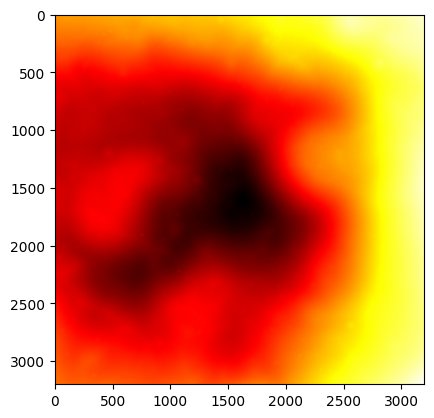

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import colors
from PIL import Image

plt.imshow(img)
plt.show()

for i in range(len(img)):
    for j in range(len(img[i])):
        for k in range(len(img[i][j])):
            img[i][j][k] = round(img[i][j][k], 5)*255

# # img = colors.hsv_to_rgb(img)
# img = img*255

im = Image.fromarray(np.uint8(img))

im.save('Height17.png')
